<a href="https://colab.research.google.com/github/Kunal02880/Qunatum-phenomeno-/blob/main/JC_Ham_My_solution(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pylab as plt
from qutip import *



In [ ]:
'''-----------------------------------------
Jaynes–Cummings Hamiltonian
--------------------------------------------

Exercise JC.1 - Revival of Rabi oscillations with one atom.

Use the parameters written in the next cell.

JC.1.0 - 5 pt - Prepare a function that returns the JC Hamiltonian.
                Print an example with a dimension of the photon space of 2 quanta.
JC.1.1 - 2 pt - Prepare a list of measurement operators that can be used to get the following expectation values
                1) the population of the atom's ground state
                2) the population of the atom's excited state
JC.1.2 - 5 pt - Evolve the Hamiltonian for 50 us starting with the atom in the ground state
                and the field in the fock state with n = 3.
                Plot the evolution of the operators defined in JC.1.1 over time
                Hint: use at least 50 states in the photon space.
JC.1.3 - 5 pt - Evolve the Hamiltonian for 50 us starting with the atom in the ground state
                and the field in the coherent state with alpha = 3.1 .
                Plot the evolution of the operators defined in JC.1.1 over time
                Hint: use at least 50 states in the photon space.
JC.1.4 - 5 pt - Plot the population of the atom's excited state over 10 us
                for several fock states. Plot n = 0, n = 1, n = 2, n = 3 and n = 4.
JC.1.5 - 5 pt - Plot the population of the atom's excited state over 50 us.
                for several coherent states. Plot alpha = 0, alpha = 1, alpha = 2, alpha = 3 and alpha = 4.
JC.1.5* - 5 pt - Write in the legend the average number of photons in the initial state

'''

"-----------------------------------------\nJaynes–Cummings Hamiltonian\n--------------------------------------------\n\nExercise JC.1 - Revival of Rabi oscillations with one atom.\n\nUse the parameters written in the next cell.\n\nJC.1.0 - 5 pt - Prepare a function that returns the JC Hamiltonian. \n                Print an example with a dimension of the photon space of 2 quanta.\nJC.1.1 - 2 pt - Prepare a list of measurement operators that can be used to get the following expectation values\n                1) the population of the atom's ground state\n                2) the population of the atom's excited state\nJC.1.2 - 5 pt - Evolve the Hamiltonian for 50 us starting with the atom in the ground state\n                and the field in the fock state with n = 3.\n                Plot the evolution of the operators defined in JC.1.1 over time\n                Hint: use at least 50 states in the photon space.\nJC.1.3 - 5 pt - Evolve the Hamiltonian for 50 us starting with the atom i

In [ ]:

# cavity and atom frequency
Omega_ph = 0.0 * 2 * np.pi # MHz
Omega_atom = Omega_ph # MHz
# coupling strength
g  = 0.1 * 2 * np.pi # MHz


In [ ]:
#-----------------------------------
# JC.1.0 - 5 pt - Prepare a function that returns the JC Hamiltonian.
#                Print an example with a dimension of the photon space of 2 quanta.
#------------------------------------
N=3

def hamiltonian(N,Omega,g):
    a = tensor(identity(2),destroy(N))
    adag = a.dag()
    sm = tensor(destroy(2),identity(N))
    sm_dag = sm.dag()
    sz = tensor(sigmaz(),identity(N))
    H = (0.5 * Omega * sz+ Omega * a.dag() * a+ g * (a.dag() * sm + a * sm.dag()))
    return H

hamiltonian(N,Omega_ph,g)




Quantum object: dims=[[2, 3], [2, 3]], shape=(6, 6), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.62831853 0.         0.        ]
 [0.         0.         0.         0.         0.88857659 0.        ]
 [0.         0.62831853 0.         0.         0.         0.        ]
 [0.         0.         0.88857659 0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]]

In [ ]:
#---------------------------------------------------------
# JC.1.1 - 2 pt - Prepare a list of measurement operators that can be used to get the following expectation values
#                1) the population of the atom's ground state
#                2) the population of the atom's excited state
#---------------------------------------------------------
N= 50
grou_state_measure = tensor(fock_dm(2,0),qeye(N))
excited_state_measure = tensor(fock_dm(2,1),qeye(N))

e_ops = [grou_state_measure ,excited_state_measure]

/var/folders/mc/cp7sc79j38qgs4_f863nt4z80000gn/T/ipykernel_37474/3617482960.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


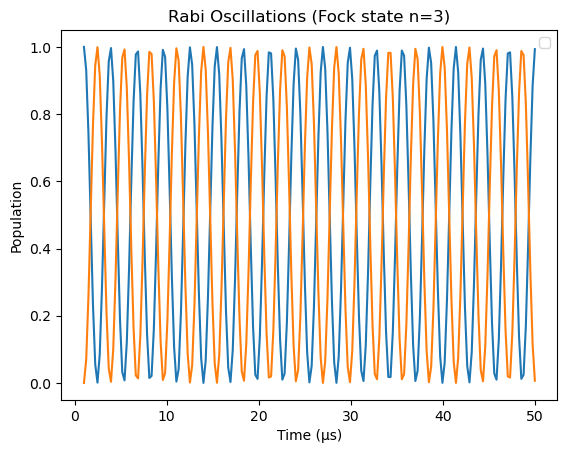

In [ ]:
# ---------------------------------------------------------
# JC.1.2 - 5 pt - Evolve the Hamiltonian for 50 us starting with the atom in the ground state
#                and the field in the fock state with n = 3.
#                Plot the evolution of the operators defined in JC.1.1 over time
#                Hint: use at least 50 states in the photon space.
# ----------------------------------------------------------
N = 50
psi = tensor(fock(2,0),fock(N,3))
t = np.linspace(1,50,201)
result = mesolve(hamiltonian(N,Omega_ph,g),psi,t,[],e_ops)

plt.plot(t,result.expect[0])
plt.plot(t,result.expect[1])
plt.xlabel("Time (μs)")
plt.ylabel("Population")
plt.title("Rabi Oscillations (Fock state n=3)")
plt.legend()
plt.show()


/var/folders/mc/cp7sc79j38qgs4_f863nt4z80000gn/T/ipykernel_37474/4088199077.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


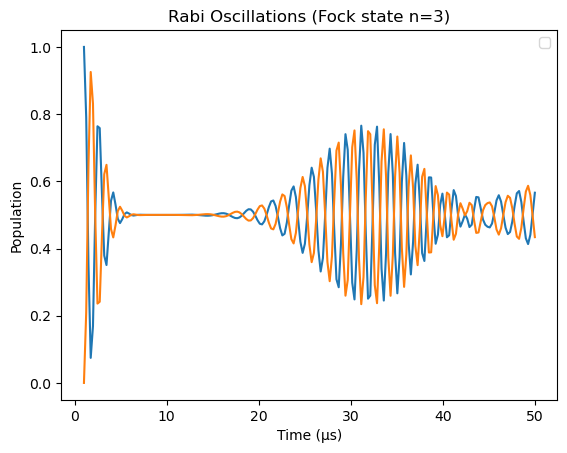

In [ ]:
#----------------------------------------------
# JC.1.3 - 5 pt - Evolve the Hamiltonian for 50 us starting with the atom in the ground state
#                and the field in the coherent state with alpha = 3.1 .
#                Plot the evolution of the operators defined in JC.1.1 over time
#                Hint: use at least 50 states in the photon space.
#-----------------------------------------------
N = 50
alpha = 3.1
psi = tensor(fock(2,0),coherent(N,alpha))
t = np.linspace(1,50,201)
result = mesolve(hamiltonian(N,Omega_ph,g),psi,t,[],e_ops)

plt.plot(t,result.expect[0])
plt.plot(t,result.expect[1])
plt.xlabel("Time (μs)")
plt.ylabel("Population")
plt.title("Rabi Oscillations (Fock state n=3)")
plt.legend()
plt.show()

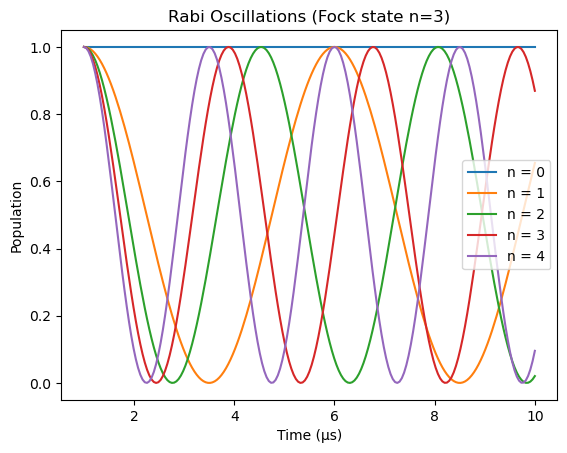

In [ ]:
# -----------------------------------------------
# JC.1.4 - 5 pt - Plot the population of the atom's excited state over time for 10 us
#                for several fock states. Plot n = 0, n = 1, n = 2, n = 3 and n = 4.
#------------------------------------------------

N = 50

t = np.linspace(1,10,201)
for n in range(5):
    psi = tensor(fock(2,0),fock(N,n))
    result = mesolve(hamiltonian(N,Omega_ph,g),psi,t,[],e_ops)
    plt.plot(t, result.expect[0], label=f"n = {n}")
    #plt.plot(t,result.expect[0])
    #plt.plot(t,result.expect[1])

plt.xlabel("Time (μs)")
plt.ylabel("Population")
plt.title("Rabi Oscillations (Fock state n=3)")
plt.legend()
plt.show()


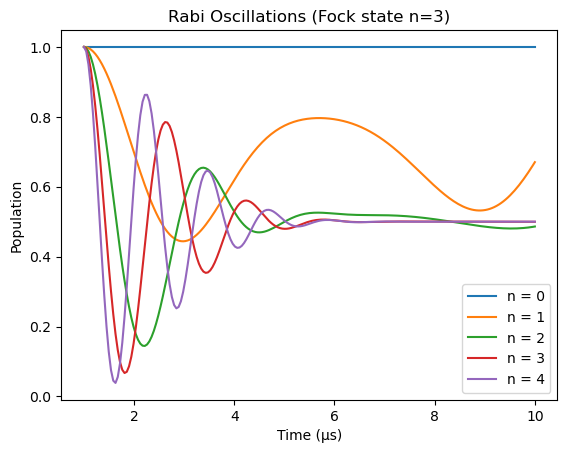

In [ ]:
#--------------------------------------------
# JC.1.5 - 5 pt - Plot the population of the atom's excited state over 50 us.
#                for several coherent states. Plot alpha = 0, alpha = 1, alpha = 2, alpha = 3 and alpha = 4.
# JC.1.5* - 5 pt - Write in the legend the average number of photons in the initial state
#--------------------------------------------
N = 50

t = np.linspace(1,10,201)
for n in range(5):
    psi = tensor(fock(2,0),coherent(N,n))
    result = mesolve(hamiltonian(N,Omega_ph,g),psi,t,[],e_ops)
    plt.plot(t, result.expect[0], label=f"n = {n}")
    #plt.plot(t,result.expect[0])
    #plt.plot(t,result.expect[1])

plt.xlabel("Time (μs)")
plt.ylabel("Population")
plt.title("Rabi Oscillations (Fock state n=3)")
plt.legend()
plt.show()